(1, 3)

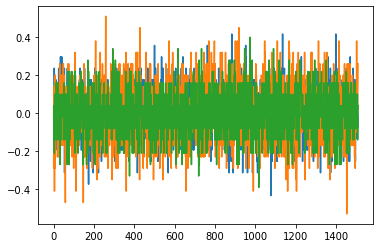

In [3]:
#gyroscope calibration
data_g=np.loadtxt("nyugalom.txt")[:,3:6]
offset=np.array([data_g.mean(axis=0)])
data_g-=offset
plt.plot(data_g[:,0])
plt.plot(data_g[:,1])
plt.plot(data_g[:,2])
offset.shape

(3, 2953)


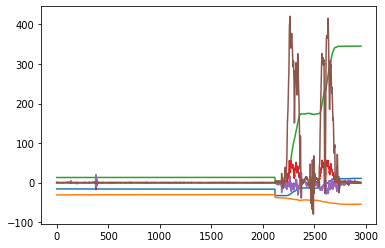

In [4]:
#dead reckoning of orientation
import numpy as np
import matplotlib.pyplot as plt 
import math
data=np.loadtxt("zaxis360.txt")
w=np.array([data[:,3],data[:,4],data[:,5]])-offset.T#szogsebesseg
print(w.shape)
f=np.array([data[:,0],data[:,1],data[:,2]]) # ero
szog=np.array([0,0,0])#yaw pitch roll angles
orientation=np.zeros([3,len(data[:,9])])


for i in range(len(data[:,9]+1)):
    szog=0.5*(w[:,i]+w[:,i-1])*(abs(data[i-1,9]-data[i,9])/1000)
    orientation[:,i]=orientation[:,i-1]+ szog
#orientation%=360
plt.plot(orientation[0,:])
plt.plot(orientation[1,:])
plt.plot(orientation[2,:])

plt.plot(w[0])
plt.plot(w[1])
plt.plot(w[2])
#plt.xlim(100,400)
#plt.ylim(-30,30)

array([-0.998 , -1.0015, -1.005 ])

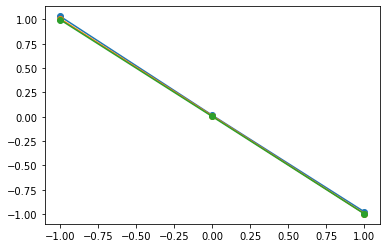

In [5]:
#gyorsulas szenzor kalibralas
from scipy.optimize import curve_fit
a_data=np.loadtxt("accelo_calibration_z.txt")[:,:3]
z=np.array([np.mean(a_data[0:10,2]),np.mean(a_data[10:20,2]),np.mean(a_data[20:30,2])])
y=np.array([np.mean(a_data[30:40,1]),np.mean(a_data[40:50,1]),np.mean(a_data[50:60,1])])
x=np.array([np.mean(a_data[60:70,0]),np.mean(a_data[70:80,0]),np.mean(a_data[80:90,0])])
g=np.array([-1,0,1])
plt.plot(g,z,marker="o")
plt.plot(g,y,marker="o")
plt.plot(g,x,marker="o")

def f(x,a,b):
    return x*a + b

popt=np.zeros([3,2])
popt[2,:],pcovz=curve_fit(f,g,z) 
popt[1,:],pcovz=curve_fit(f,g,y)
popt[0,:],pcovz=curve_fit(f,g,x) 
popt[:,0]


In [1]:

data=np.loadtxt("nyugalom2.txt")

def calib(data):
    data[0:3]=data[0:3]*popt[:,0]**(-1)-popt[:,1]
    data[3:6]=data[3:6]-offset
    #data[6:9]=(data[6:9]-a).dot(M)
    return data
plt.plot(data[:,9],data[:,6])
plt.plot(data[:,9],data[:,7])
plt.plot(data[:,9],data[:,8])
for i in range(len(data[:,9])):
    data[i,:]=calib(data[i,:])
               
plt.plot(data[:,9],data[:,6])
plt.plot(data[:,9],data[:,7])
plt.plot(data[:,9],data[:,8])
    

NameError: name 'np' is not defined

28.39814467947683

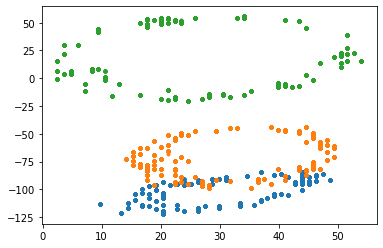

In [19]:
#magnetometer kalibralas
data_mz=np.loadtxt("magz.txt")[:,6:9]
data_mx=np.loadtxt("magx.txt")[:,6:9]
data_my=np.loadtxt("magy.txt")[:,6:9]
#np.mean(data_mz[:,1])

m_meanx=np.mean(np.append(data_mz[:,0],data_my[:,0]))
m_meany=np.mean(np.append(data_mz[:,1],data_mx[:,1]))
m_meanz=np.mean(np.append(data_mx[:,2],data_my[:,2]))

plt.plot(data_mx[:,1],data_mx[:,2],linestyle = " ",marker=".")
plt.plot(data_my[:,0],data_my[:,2],linestyle = " ",marker=".")
plt.plot(data_mz[:,0],data_mz[:,1],linestyle = " ",marker=".")
#fig=plt.figure()
#ax=plt.axes(projection='3d')
#ax.plot3D(data_m[:,0],data_m[:,1],data_m[:,2],linestyle = " ",marker=".")
#plt.plot(data_m[:,0],data_m[:,1],linestyle = " ",marker=".")
#plt.plot(data_m[:,0],data_m[:,2],linestyle = " ",marker=".")
#plt.plot(data_m[:,1],data_m[:,2],linestyle = " ",marker=".")
#plt.xlim(-200,200)
#plt.ylim(-200,200)


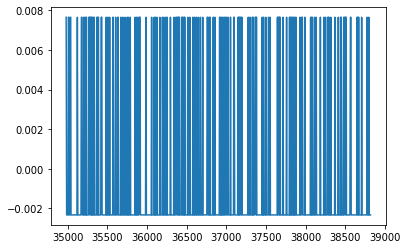

In [32]:
data=np.loadtxt("nyugalom2.txt")

def calib(data):
    data[0:3]=(data[0:3]-popt[:,1])*popt[:,0]**(-1)
    data[3:6]=data[3:6]-offset
    data[6:9]-=np.array([m_meanx,m_meany,m_meanz])
    return data


#plt.plot(data[:,9],data[:,6])
#plt.plot(data[:,9],data[:,7])
#plt.plot(data[:,9],data[:,8])
for i in range(len(data[:,9])):
    data[i,:]=calib(data[i,:])
               
plt.plot(data[:,9],data[:,1])
#plt.plot(data[:,9],data[:,7])
#plt.plot(data[:,9],data[:,8])

In [ ]:
##kalman szuro
import numpy as np
import matplotlib.pyplot as plt

def calib(dat):
    offset=np.array([[2.51468212, 1.63125828, 2.22166887]])#gyroscope offset

    popt=np.array([[-9.98000000e-01,  9.99999998e-04],#accelometer calibration
    [-1.00150000e+00,  7.66666673e-03],
    [-1.00500000e+00,  2.40000000e-02]])

    #magneto
    hardiron=np.array( [  30.301916, 25.042095,-113.504275])
    softiron=np.array(  [[1.110844,-0.018576, -0.054831],
        [-0.018576, 0.904965, -0.222311],
        [-0.054831 ,-0.222311,  0.616734]])



    dat[0:3]=(dat[0:3]*abs(popt[:,0])-popt[:,1])*9.807813
    dat[3:6]=np.deg2rad(dat[3:6]-offset)
    dat[6:9]=np.matmul(softiron,(dat[6:9]-hardiron))
    dat[6:9]=dat[7],-dat[6],-dat[8]
    dat[9]=dat[9]/1000
   
    return dat


dataraw=np.loadtxt("patogas.txt")




x=0
v=0


X=[0,0,0]
P=np.ones(3)
Q=np.array([[0.1,0,0],
           [0,0.1,0],
           [0,0,0.1],])

var_a=1#1398.4824827304847
R=np.array([[var_a,0,0],
            [0,var_a,0],
            [0,0,var_a]])





H=np.array([[1,0,0],[0,1,0],[0,0,1]])



states=np.zeros([len(dataraw[:,0]),3])
states2=np.zeros([len(dataraw[:,0]),3])
data=np.zeros([len(dataraw[:,0]),10])

data[0,:]=calib(dataraw[0,:])

for i in range(1,len(dataraw[:,9])):
    data[i,:]=calib(dataraw[i,:])
    
    dt=data[i,9]-data[i-1,9]

    A=np.array([[1,dt,0.5*dt**2],
            [0,1,dt],
            [0,0,1],])

    a=np.linalg.norm(data[i,:3])

#predikció
    
  
    X=np.dot(A,X)
  
    
    P=np.dot(A,np.dot(P,np.transpose(A)))+1*Q
    
#mérés
  
    v+=a*dt
 
    x+=v*dt
    z=np.array([x,v,a])
    states[i,:]=z
    y=z-np.dot(H,X)
    S=np.dot(H,np.dot(P,np.transpose(H)))+R
    KG=np.dot(P,np.dot(np.transpose(H),np.linalg.inv(S)))
    
    X+=np.dot(KG,y)
   
    states2[i,:]=X
    P=np.dot((np.eye(3)-np.dot(KG,H)),P)

plt.figure(figsize=(10,7))
#plt.plot(data[:,9],states[:,0])
#plt.plot(data[:,9],states[:,1])
plt.plot(data[:,9],states[:,2],label="Mért a")


#plt.plot(data[:,9],states2[:,0])
#plt.plot(data[:,9],states2[:,1])
plt.plot(data[:,9],states2[:,2],label="Kálmán szűrővel korigált a")
plt.xlabel("t[s]")
plt.ylabel("$a[m/s^2]$")
#plt.ylim(9.6,10.2)
#plt.xlim(40,45)
plt.legend()
plt.grid()

plt.show()


In [ ]:
1#Kalman szuro 
#process model
#giroszkop adat,quaterniok,gauss noise, ido
def process_model(w,q,sigma2,dt):
    
    wx=np.array([0,w[2],-w[1]],[-w[2],0,w[0]],[w[1],-w[0],0])
    omega=0.5*np.array([wx,w],[-w.transpose,0])
    vg=gauss(sigma2,0,w)
    Ck=-(dt/2)*np.array([-q[3],-q[2],-q[1]],[q[1],-q[3],-q[0]],[-q[1],q[0],-q[3]],[q[0],q[1],q[2]])*vg
    
    qk=q+np.dot(omega,q)*dt+Ck #process model
    gyro_cov_matrix=np.dot(sigma2,np.ones(3,3))
    Qk=(-dt/2)**2 *Ck*gyro_cov_matrix*Ck.transpose        #process noise covariance matrix
    
    return qk,Qk


#(roll pitch yaw),process model,measurment noise
def measurement_model(angles,ek):
    Roll=angles[0]/2
    Pitch=angles[1]/2
    Yaw=angles[2]/2
    #quaterniok
    q1=np.array([np.sin(Roll)*np.cos(Pitch)*np.cos(Yaw)-np.cos(Roll)*np.sin(Pitch)*np.sin(Yaw)])
    q2=np.array([np.cos(Roll)*np.sin(Pitch)*np.cos(Yaw)+np.sin(Roll)*np.cos(Pitch)*np.sin(Yaw)])
    q3=np.array([np.cos(Roll)*np.cos(Pitch)*np.sin(Yaw)+np.sin(Roll)*np.sin(Pitch)*np.cos(Yaw)])
    q4=np.array([np.cos(Roll)*np.cos(Pitch)*np.cos(Yaw)+np.sin(Roll)*np.sin(Pitch)*np.sin(Yaw)])
    Z=np.array([q1,q2,q3,q4])
    return Z +ek



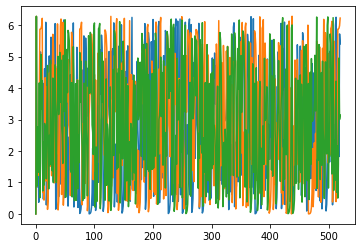

In [3]:
#kalman szuro
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt("ferdeszog.txt")

offset=np.array([[2.51468212, 1.63125828, 2.22166887]])#gyroscope offset

popt=np.array([[-9.98000000e-01,  9.99999998e-04],#accelometer calibration
       [-1.00150000e+00,  7.66666673e-03],
       [-1.00500000e+00,  2.40000000e-02]])

#magneto
hardiron=np.array( [  30.301916, 25.042095,-113.504275])
softiron=np.array(  [[1.110844,-0.018576, -0.054831],
    [-0.018576, 0.904965, -0.222311],
    [-0.054831 ,-0.222311,  0.616734]])

def calib(data):
    data[0:3]=(data[0:3]*abs(popt[:,0])-popt[:,1])*9.807813
    data[3:6]=(data[3:6]-offset)
    data[6:9]=np.matmul(softiron,(data[6:9]-hardiron))
    data[6:9]=data[7],-data[6],-data[8]
    data[9]/=1000
    return data

Ts=0.004
X=[0,0,0,0,0,0]
P=np.ones(6)
Q=np.array([[0.001,0,0,0,0,0],
           [0,0.001,0,0,0,0],
           [0,0,0.001,0,0,0],
           [0,0,0,0.001,0,0],
           [0,0,0,0,0.001,0],
           [0,0,0,0,0,0.001]])

R=np.array([[0.05,0,0],
            [0,0.05,0],
            [0,0,0.05]])

F=np.array([[1,-Ts,0,0,0,0],
            [0,1,0,0,0,0],
            [0,0,1,-Ts,0,0],
            [0,0,0,1,0,0],
            [0,0,0,0,1,-Ts],
            [0,0,0,0,0,1]])

G=np.array([[Ts,0,0],
            [0,0,0],
            [0,Ts,0],
            [0,0,0],
            [0,0,Ts],
            [0,0,0]])

H=np.array([[1,0,0,0,0,0],
            [0,0,1,0,0,0],
            [0,0,0,0,1,0]])

def angle2(accel,mag):
    roll=np.arctan2(accel[1],accel[2])
    pitch=np.arctan2(-accel[0],(accel[1]**2+accel[2]**2)**0.5)
    Cnb=np.array([[np.cos(roll),np.sin(pitch)*np.sin(roll),np.cos(pitch)*np.sin(roll)],
                 [0,np.cos(pitch),-np.sin(pitch)],
                 [-np.sin(roll),np.sin(pitch)*np.cos(roll),np.cos(pitch)*np.cos(roll)]])              
   
    
    north=np.dot(Cnb,mag)
    yaw=-np.arctan(north[1]/north[0])  

 
    return np.array([roll,pitch,yaw]) 



states=np.zeros([len(data[:,0]),6])
for i in range(1,len(data[:,9])):
    data[i,:]=calib(data[i,:])
    gyro=data[i,3:6]
    mag=data[i,6:9]/np.linalg.norm(data[i,6:9])
    accel=data[i,:3]/np.linalg.norm(data[i,:3])
    
    roll=-np.arctan2(accel[1],(accel[0]**2+accel[2]**2)**0.5)
    pitch=-np.arctan2(accel[0],(accel[1]**2+accel[2]**2)**0.5)
   
    down=accel
    east=np.cross(down,mag)
    east/=np.linalg.norm(east)
    north=np.cross(east,down)
    north/=np.linalg.norm(north)
    yaw=-np.arctan2(north[1],north[0])

    

    roll=np.degrees(roll)
    pitch=np.degrees(pitch)
    yaw=np.degrees(yaw)
#predikció
    u=gyro
    X=np.dot(F,X)+np.dot(G,u)
    X=X%2*np.pi
    states[i,:]=X
    #P=np.dot(F,np.dot(P,np.transpose(F)))+1*Q
#measurmen

    #z=np.array([roll,pitch,yaw])
    #y=z-np.dot(H,X)
    #S=np.dot(H,np.dot(P,np.transpose(H)))+R
    #KG=np.dot(P,np.dot(np.transpose(H),np.linalg.inv(S)))
    #X=X+np.dot(KG,y)
    #states[i,:]=X
    #P=np.dot((np.eye(6)-np.dot(KG,H)),P)

plt.plot(states[:,0])
#plt.plot(states[:,1])
plt.plot(states[:,2])
#plt.plot(states[:,3])
plt.plot(states[:,4])
#plt.plot(states[:,5])

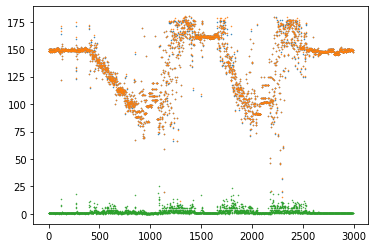

In [42]:
import time
import math
from pyquaternion import Quaternion
import numpy as np
import vectormath as vmath
data=np.loadtxt("magz.txt")
# Read acceleration, magnetometer, and gyroscope
states=np.zeros([len(data[:,0]),3])
for i  in range(len(data[:,0])):
    accel_x, accel_y, accel_z = data[i,:3]
    mag_x, mag_y, mag_z = data[i,6:9]
    gyro_x, gyro_y, gyro_z = data[i,3:6]

# Define vectors for each sensor reading
    accelerometer = vmath.Vector3(accel_x, accel_y, accel_z)
    gyroscope = vmath.Vector3(math.radians(gyro_x), math.radians(gyro_y), math.radians(gyro_z))
    magnetometer = vmath.Vector3(mag_x, mag_y, mag_z)

# Normalize the magnetometer and accelerometer vectors
    magnetometer = magnetometer.normalize()
    accelerometer = accelerometer.normalize()

    down = -accelerometer # Get down vector, which is opposite the accelerometer reading
    east = down.cross(magnetometer) # Get vector pointing east (perpendicular to down vector and magnetometer vector)
    east = east.normalize() # Normalize east vector
    north = east.cross(down) # Get vector pointing north (perpendicular to east vector and down vector)
    north = north.normalize() # Normalize north vector

# Define vectors for axes in world view
    eastworld = vmath.Vector3(0, 1, 0)
    northworld = vmath.Vector3(-1, 0, 0)
    downworld = vmath.Vector3(0, 0, -1)

# Find the angle between each vector and its respective world axis vector
    anglediffX = round(east.angle(eastworld, unit='deg'))
    anglediffY = round(north.angle(northworld, unit='deg'))
    anglediffZ = round(down.angle(downworld, unit='deg'))
    states[i,:]=np.array([anglediffX, anglediffY, anglediffZ])
    #print(anglediffX, anglediffY, anglediffZ)
plt.plot(states[:,0],marker=".",linestyle="",markersize=1)
plt.plot(states[:,1],marker=".",linestyle="",markersize=1)
plt.plot(states[:,2],marker=".",linestyle="",markersize=1)

In [ ]:
data=np.loadtxt("ferdeszog.txt")


def calib(data):
    data[0:3]=(data[0:3]*abs(popt[:,0])-popt[:,1])*9.807813
    data[3:6]=np.radians((data[3:6]-offset))
    data[6:9]=np.matmul(softiron,(data[6:9]-hardiron))
    
    return data





def dead_reckoning(omega1,omega2,t1,t2, PRJ):

    szog=np.array([0,0,0])#yaw pitch roll angles
    szog=0.5*(omega1+omega2)*(abs(t1-t2))/1000
    return szog+PRJ


orientation=np.zeros([3,len(data[:,9])])

for i in range(len(data[:,9]+1)):
    data[i,:]=calib(data[i,:])
    orientation[:,i]=dead_reckoning(data[i,3:6],data[i-1,3:6],data[i,9],data[i-1,9],orientation[:,i-1],)

    

In [ ]:
#acel+magne direction


mag=np.array([data[:,6],data[:,7],-data[:,8]]).swapaxes(0,1)




roll=np.zeros(len(data[:,9]))
pitch=np.zeros(len(data[:,9]))
yaw=np.zeros(len(data[:,9]))
yaw2=np.zeros(len(data[:,9]))
down=data[:,:3]

east=np.cross(mag,down)
north=np.cross(east,down)
for i in range(len(data[:,2])):
    
    roll[i]=np.arctan2(data[i,1],data[i,2])
    pitch[i]=np.arctan2(-data[i,0],(data[i,1]**2+data[i,2]**2)**0.5)
    hx=mag[i,0]*np.cos(pitch[i])+mag[i,1]*np.sin(pitch[i])*np.sin(roll[i])+mag[i,2]*np.sin(pitch[i])*np.cos(roll[i])
    hy=mag[i,1]*np.cos(roll[i])-mag[i,2]*np.sin(roll[i])
    yaw[i]=np.arctan2(hy,hx)
    yaw2[i]=np.arctan2(north[i,1],north[i,0])
    roll[i]=np.arctan2(data[i,1],data[i,2])
    pitch[i]=np.arctan2(-data[i,0],(data[i,1]**2+data[i,2]**2)**0.5)
  



plt.plot(roll)
plt.plot(pitch)
plt.plot(yaw2)




In [ ]:
#Kalman szuro 
#process model
#giroszkop adat,quaterniok,gauss noise, ido

def angle2(accel,mag):
    roll=np.arcsin(accel[0]/(accel[0]**2+accel[1]**2+accel[2]**2)**0.5)
    pitch=np.arctan(accel[1]/accel[2])
    Cnb=np.array([[np.cos(roll),np.sin(pitch)*np.sin(roll),np.cos(pitch)*np.sin(roll)],
                 [0,np.cos(pitch),-np.sin(pitch)],
                 [-np.sin(roll),np.sin(pitch)*np.cos(roll),np.cos(pitch)*np.cos(roll)]])              
   
    
    north=np.dot(Cnb,mag)
    yaw=-np.arctan(north[1]/north[0])  

 
    return np.array([roll,pitch,yaw])  


def process_model(w,q,sigma2,dt):
    
    wx=np.array([0,w[2],-w[1]],[-w[2],0,w[0]],[w[1],-w[0],0])
    omega=0.5*np.array([wx,w],[-w.transpose,0])
    vg=gauss(sigma2,0,w)
    Ck=-(dt/2)*np.array([-q[3],-q[2],-q[1]],[q[1],-q[3],-q[0]],[-q[1],q[0],-q[3]],[q[0],q[1],q[2]])*vg
    
    qk=q+np.dot(omega,q)*dt+Ck #process model
    gyro_cov_matrix=np.dot(sigma2,np.ones(3,3))
    Qk=(-dt/2)**2 *Ck*gyro_cov_matrix*Ck.transpose        #process noise covariance matrix
    
    return qk,Qk


#(roll pitch yaw),process model,measurment noise
def measurement_model(angles,ek):
    Roll=angles[0]/2
    Pitch=angles[1]/2
    Yaw=angles[2]/2
    #quaterniok
    q1=np.array([np.sin(Roll)*np.cos(Pitch)*np.cos(Yaw)-np.cos(Roll)*np.sin(Pitch)*np.sin(Yaw)])
    q2=np.array([np.cos(Roll)*np.sin(Pitch)*np.cos(Yaw)+np.sin(Roll)*np.cos(Pitch)*np.sin(Yaw)])
    q3=np.array([np.cos(Roll)*np.cos(Pitch)*np.sin(Yaw)+np.sin(Roll)*np.sin(Pitch)*np.cos(Yaw)])
    q4=np.array([np.cos(Roll)*np.cos(Pitch)*np.cos(Yaw)+np.sin(Roll)*np.sin(Pitch)*np.sin(Yaw)])
    Z=np.array([q1,q2,q3,q4])
    return Z +ek


In [ ]:
#pos
data=np.loadtxt("ferdeszog.txt")

def calib(data):
    data[0:3]=(data[0:3]*abs(popt[:,0])-popt[:,1])*9.807813
    data[3:6]=np.radians((data[3:6]-offset))
    data[6:9]=np.matmul(softiron,(data[6:9]-hardiron))
    data[6:9]=data[7],data[6],-data[8]
    data[9]=data[9]/1000
    return data





for i in range(len(data[:,9])):
    data[i,:]=calib(data[i,:])


def transf(szog,a):
    
    roll=szog[0]
    pitch=szog[1]
    yaw=szog[2]
    Rx=np.array([[1,0,0],[0,np.cos(roll),-np.sin(roll)],[0,np.sin(roll),np.cos(roll)]])
    Ry=np.array([[np.cos(pitch),0,np.sin(pitch)],[0,1,0],[-np.sin(pitch),0,np.cos(pitch)]])
    Rz=np.array([[np.cos(yaw),-np.sin(yaw),0],[np.sin(yaw),np.cos(yaw),0],[0,0,1]])
  
    return np.matmul(Rz,np.matmul(Ry,np.matmul(Rx,a)))
    
# kindulási szög számolása
gyro=data[:10,3:6]
mag=data[:10,6:9]/np.linalg.norm(data[i,6:9])
accel=data[:10,:3]/np.linalg.norm(data[i,:3])
    
roll0=np.mean(-np.arctan2(accel[1],(accel[0]**2+accel[2]**2)**0.5))
pitch0=np.mean(-np.arctan2(accel[0],(accel[1]**2+accel[2]**2)**0.5))
   
down=accel
east=np.cross(down,mag)
east/=np.linalg.norm(east)
north=np.cross(east,down)
north/=np.linalg.norm(north)
yaw0=np.mean(-np.arctan2(north[1],north[0]))

print(np.rad2deg(roll0),np.rad2deg(pitch0),np.rad2deg(yaw0))

orientation=np.zeros([9,len(data[:,9])])
a_ref=np.array([0,0,0])
szog=np.array([roll0,pitch0,yaw0])
x=np.array([0,0,0])
v=np.array([0,0,0])
for i in range(1,len(data[:,9])):
   
    dt=data[i,9]-data[i-1,9]
    szog=szog+data[i,3:6]*dt
    a_ref=transf(szog,data[i,:3])
    #a_ref=a_ref/np.linalg.norm(a_ref)
    v=orientation[3:6,i-1]+a_ref*dt
    print(szog*180/np.pi)
    x=orientation[:3,i-1]+v*dt
    orientation[:,i]=np.array([x,v,a_ref]).flatten()
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')
ax.view_init(15, 25)
ax.plot(orientation[0,:],orientation[1,:],orientation[2,:])


In [ ]:
#kalman szuro
import numpy as np
import matplotlib.pyplot as plt

data=np.loadtxt("guritas.txt")
t=data[:,9]
def accel_mag(data):
     
      a=data[:3]
      g=data[3:6]
      m=data[6:9]
      
      roll = np.arctan2(a[1], a[2] + 0.05*a[0])
      pitch = np.arctan2(-1*a[0], np.sqrt(np.square(a[1]) + np.square(a[2]) ))
     

      m = m/(m[0]**2+m[1]**2+m[2]**2)**0.5
      yaw = np.arctan2(np.sin(roll)*m[2] - np.cos(roll)*m[1],\
            np.cos(pitch)*m[0] + np.sin(roll)*np.sin(pitch)*m[1] \
            + np.cos(roll)*np.sin(pitch)*m[2])
      roll = np.degrees(roll)
      pitch = np.degrees(pitch)
      yaw = np.degrees(yaw)

      return [roll,pitch,yaw]



xbias=0
dt=0.04
def proc(x,w,dt,P):
      xnoise=0.001
      bias=0.001
      Q=np.array([[xnoise,0],[0,bias]])
      F=np.array([[1,-dt],[0,1]])
      B=np.array([dt,0])
      x=np.dot(F,x)+np.dot(B,w)
      P=np.dot(F,np.dot(P,np.transpose(F)))+Q
      return x,P

def meas(x_p,P_p,z):
      R=np.array([[0.01,0],[0,0.01]])#szenzor noise
      H=np.array(1,0)
      xm=np.dot(H,x_p)
      Pm=np.dot(H,np.dot(P_p,np.traspose(H)))
      kalmangain=Pm/(Pm+R)
      x_new=xm-np.dot(kalmangain,(z-xm))
      P_new=Pm-np.dot(kalmangain,Pm)
      return x_new,P_new


teta=np.zeros([3,len(data)])
x0=np.array([accel_mag(data[0,:])[0],0])
y0=np.array([accel_mag(data[0,:])[1],0])
z0=np.array([accel_mag(data[0,:])[2],0])
px0=np.array([[0,0],[0,0]])
py0=np.array([[0,0],[0,0]])
pz0=np.array([[0,0],[0,0]])
for i in range(1,len(data[:,0])):
      data[i,:]=calib(data[i,:])
      gyro=data[i,3:6]
      x0,px0=proc(x0,gyro[0],t[i]-t[i-1],px0)
      y0,py0=proc(y0,gyro[1],t[i]-t[i-1],py0)
      z0,pz0=proc(z0,gyro[2],t[i]-t[i-1],pz0)
      teta[:,i]=np.array([x0[0],y0[0],z0[0]])
      r_m,p_m,y_m=accel_mag(data[i,:])


      teta[:,i]



plt.plot(teta[0],marker=".",linestyle="")

plt.plot(teta[1],marker=".",linestyle="")

plt.plot(teta[2],marker=".",linestyle="")






In [ ]:
accel_dat=np.linalg.norm(data[:,:3],axis=1)
lockal_max=np.array(argrelextrema(accel_dat, np.greater)).flatten()


bouncplaces=[]
bouncvalues=[]
for i in lockal_max:
   
    if accel_dat[i]>15:
        bouncplaces.append(i)
        bouncvalues.append(accel_dat[i])
